## Week 8 Progress Coefficient Factor

In [1]:
import numpy as np
import pandas as pd
import ast
from sklearn.linear_model import LogisticRegressionCV
import matplotlib.pyplot as plt

In [2]:
D = pd.read_csv('final_data.csv')
D.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [3]:
X = D.dropna()

In [4]:
df_i = X[X['position'].astype(str).str.startswith('Attack')]

In [5]:
df = df_i.drop(columns=['name', 'player', 'team', 'position', 'goals conceded', 'position_encoded', 'clean sheets'])
df.head()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,minutes played,days_injured,games_injured,award,current_value,highest_value,winger
23,185.0,25.0,88,0.528790,0.196408,0.075541,0.000000,0.000000,5957,319,35,9,80000000,85000000,1
24,180.0,23.0,79,0.219780,0.109890,0.000000,0.000000,0.000000,4914,173,32,5,55000000,130000000,1
25,178.0,21.0,63,0.236220,0.206693,0.029528,0.000000,0.029528,3048,0,0,1,25000000,25000000,1
26,180.0,18.0,72,0.525730,0.300417,0.225313,0.025035,0.000000,3595,50,11,2,25000000,25000000,1
27,172.0,23.0,80,0.335252,0.228581,0.182865,0.015239,0.000000,5906,196,22,5,70000000,75000000,1


In [6]:
df['goals'].max()

11.25

In [7]:
df['goals'].min()

0.0

In [8]:
df['Rating'] = pd.cut(df.goals,[0, 0.33, 11.25],labels=['bad','good'])
df.Rating.value_counts()

Rating
bad     1278
good    1095
Name: count, dtype: int64

In [9]:
df = df[df['Rating'].notna()]

In [10]:
Y = df.drop(['Rating', 'goals'], axis=1)
Y.head(2)

,height,age,appearance,assists,yellow cards,second yellow cards,red cards,minutes played,days_injured,games_injured,award,current_value,highest_value,winger
23,185.0,25.0,88,0.196408,0.075541,0.0,0.0,5957,319,35,9,80000000,85000000,1
24,180.0,23.0,79,0.109890,0.000000,0.0,0.0,4914,173,32,5,55000000,130000000,1


In [11]:
# define target
Z = df.Rating
Z.head()

23    good
24     bad
25     bad
26    good
27    good
Name: Rating, dtype: category
Categories (2, object): ['bad' < 'good']

In [12]:
# standardize numerical features to put them on equal footing
Y_std = (Y - Y.mean())/Y.std()
Y_std.head(2) 

,height,age,appearance,assists,yellow cards,second yellow cards,red cards,minutes played,days_injured,games_injured,award,current_value,highest_value,winger
23,0.750585,-0.231407,1.723349,0.312165,-0.648984,-0.244263,-0.223669,1.874027,1.045789,0.729949,1.312458,6.125225,4.046436,1.033646
24,0.011247,-0.669462,1.353960,-0.361046,-1.147948,-0.244263,-0.223669,1.276168,0.232465,0.604105,0.508674,4.077816,6.446997,1.033646


In [13]:
print("Number of NaNs in Y_std:", np.isnan(Y_std).sum())
print("Shape of Y_std:", Y_std.shape)
print("NaN rows in Y_std:", np.isnan(Y_std).any(axis=1).sum())

Number of NaNs in Y_std: height                 0
age                    0
appearance             0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
winger                 0
dtype: int64
Shape of Y_std: (2373, 14)
NaN rows in Y_std: 0


In [14]:
print("Number of NaNs in Z:", Z.isna().sum())
print("Shape of Z:", Z.shape)
print("Any NaNs in Z:", Z.isna().any())

Number of NaNs in Z: 0
Shape of Z: (2373,)
Any NaNs in Z: False


In [15]:
# create logistic regressor with automatic cross-validation
lregCV = LogisticRegressionCV(Cs=100,n_jobs=-1)

lregCV.fit(Y_std, Z)

LogisticRegressionCV(Cs=100, n_jobs=-1)

In [16]:
lregCV.scores_['good'].shape

(5, 100)

In [17]:
results = pd.DataFrame()
results['log C'] = np.log(lregCV.Cs_)
results['validation accuracy'] = lregCV.scores_['good'].mean(axis=0)
results.head(3)

,log C,validation accuracy
0,-9.210340,0.546138
1,-9.024273,0.552876
2,-8.838205,0.560035


<Axes: xlabel='log C'>

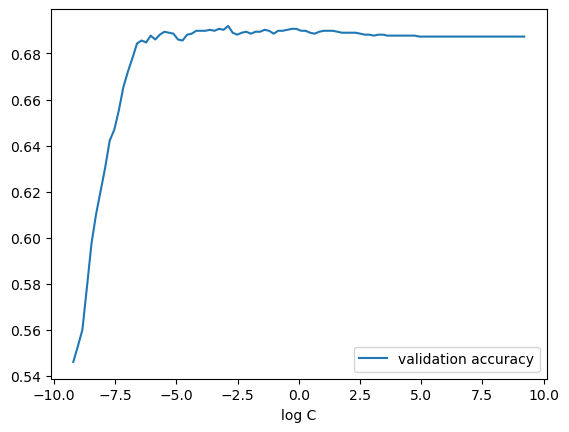

In [18]:
results.plot.line(x='log C',y='validation accuracy')

In [19]:
# best C values
np.log(lregCV.C_[0])

np.float64(-2.8840459750632483)

current_value          0.406722
award                  0.376884
minutes played         0.297614
height                 0.262405
assists                0.135517
games_injured          0.053252
days_injured           0.034762
yellow cards           0.025214
second yellow cards   -0.014108
red cards             -0.094541
highest_value         -0.105912
age                   -0.215285
appearance            -0.332533
winger                -0.734873
dtype: float64

Text(0.5, 0, 'feature weights')

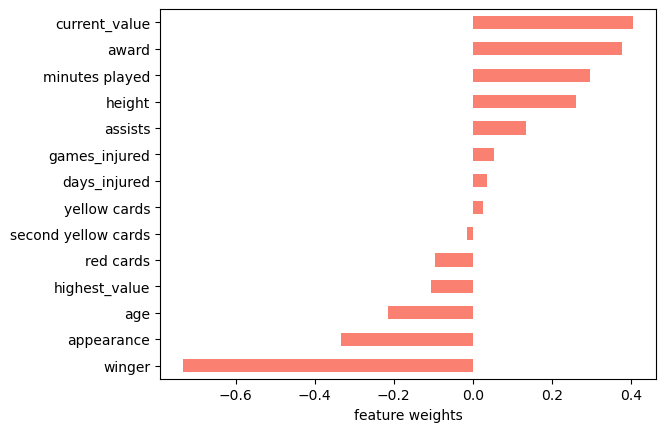

In [20]:
# feature coefficients
coef = lregCV.coef_[0]
coef = pd.Series(coef,index=Y_std.columns)
display(coef.sort_values(ascending=False))
coef.sort_values(ascending=True).plot.barh(color='salmon')
plt.xlabel('feature weights')